In [42]:
import torch
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
torch.tensor([3,3])

tensor([3, 3])

In [ ]:
EEG1 = torch.rand(29, 2560)

In [ ]:
EEG2 =  torch.rand(29, 2560)

In [ ]:
EEG3 = EEG1 + EEG2

In [ ]:
EEG3.shape

torch.Size([29, 2560])

In [ ]:
EEG1[1].shape

torch.Size([2560])

In [43]:
#split a univariate sequence into samples
def split_seq(sequence, n_steps):
  X,y = list() , list()

  for i in range(len(sequence)):
    end_ix = i + n_steps

    if end_ix > len(sequence)-1:
      break

    seq_x,seq_y = sequence[i:end_ix],sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X) , array(y)
  #return X , y

In [ ]:
EEG1_epoch, label =  split_seq(EEG1[0] , 512)

In [ ]:
print(EEG1_epoch)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(label)

2048

In [ ]:
EEG1_epoch.shape
label.shape

(2048,)

In [ ]:
len(EEG1)

29

In [ ]:
EEG_epochs = []
multi_labels =[]
for k in range(len(EEG1)):
  eeg,labels = split_seq(EEG1[k] , 256)
  EEG_epochs.append(eeg)
  multi_labels.append(labels)

In [ ]:
EEG_epochs=array(EEG_epochs)

In [ ]:
EEG_epochs.shape

(29, 2304, 256)

In [ ]:
Label = array(multi_labels)

In [ ]:
Label.shape

(29, 2304)

In [ ]:
array1 = EEG_epochs[0]
array2 = Label[0]

In [ ]:
df = pd.DataFrame(array1)

In [ ]:
df[512] = array2

In [ ]:
df.shape

(2048, 513)

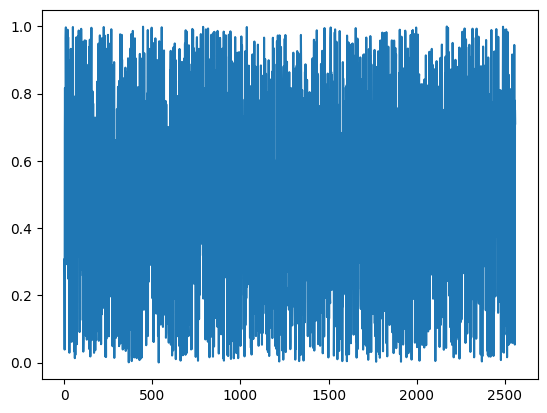

In [ ]:
plt.plot(EEG1[0])

In [ ]:
EEG_epochs.shape

(29, 2048, 512)

In [ ]:
transposed_array = np.transpose(EEG_epochs, (1, 2, 0))

# Print the shape of the transposed array
print("Transposed Array Shape:", transposed_array.shape)

Transposed Array Shape: (2304, 256, 29)


In [ ]:
EEG1_epochs = transposed_array

In [ ]:
EEG1_epochs.shape
Label = np.transpose(Label, (1,0))
Label.shape


(2304, 29)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
n_steps = 256
n_features = 29

#define model
model = Sequential()
model.add()

In [ ]:
data = torch.tensor(EEG_epochs)

<ipython-input-94-7fa757d0ce45>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  data = torch.tensor(EEG_epochs)


In [ ]:
L = torch.tensor(Label)

In [ ]:
data.shape
L.shape

torch.Size([29, 2304])

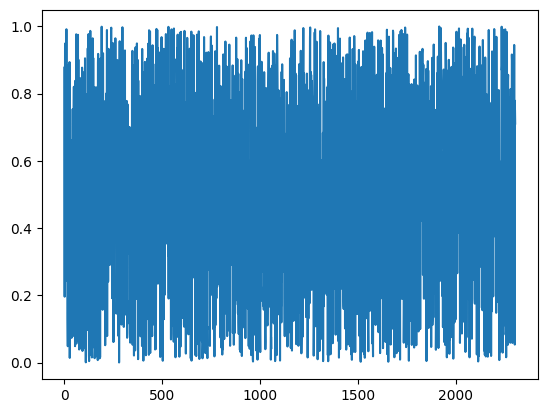

In [ ]:
plt.plot(L[0])

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
!pip install mne

In [46]:
EEG1_path = '/content/drive/MyDrive/Physionet_EEG/EEG/subject_1/PN00_2_pre_seizure_normal_EEG.edf'

In [47]:
EEG2_path = '/content/drive/MyDrive/Physionet_EEG/EEG/subject_1/PN00_2_seizure_EEG.edf'

In [48]:
EEG3_path = '/content/drive/MyDrive/Physionet_EEG/EEG/subject_1/PN00_2_post_seizure_normal_EEG.edf'

In [49]:
import mne

In [50]:
raw1 = mne.io.read_raw_edf(EEG1_path, preload=True)
raw1_resampled = raw1.copy().resample(sfreq=256)

Extracting EDF parameters from /content/drive/MyDrive/Physionet_EEG/EEG/subject_1/PN00_2_pre_seizure_normal_EEG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10239  =      0.000 ...    19.998 secs...


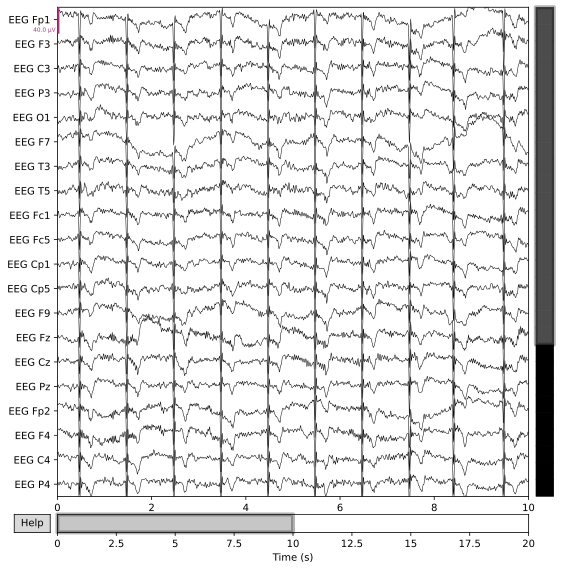

In [51]:
raw1_resampled.plot();

In [52]:
raw1_resampled.get_data().shape
#len(raw1_resampled.get_data())

(29, 5120)

In [53]:
EEG_presez_epochs = []
#multi_labels =[]
for k in range(len(raw1_resampled.get_data())):
  eeg,_ = split_seq(raw1_resampled.get_data()[k] , 256)
  EEG_presez_epochs.append(eeg)
  #multi_labels.append(labels)

In [54]:
EEG_presez_epochs = array(EEG_presez_epochs)
EEG_presez_epochs.shape

(29, 4864, 256)

In [55]:
EEG_presez_epochs[0].shape

(4864, 256)

In [56]:
pre_sez = mne.make_fixed_length_epochs(raw1_resampled.copy(),duration=1)

Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated


In [57]:
pre_sez.get_data().shape

Using data from preloaded Raw for 20 events and 256 original time points ...
0 bad epochs dropped


(20, 29, 256)

In [58]:
Label_presez=torch.zeros(19,1)
Label_presez_1 = torch.zeros(4608,1)

In [59]:
Label_presez
Label_presez_1

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [60]:
raw2 = mne.io.read_raw_edf(EEG2_path, preload=True)
raw2_resampled = raw2.copy().resample(sfreq=256)

Extracting EDF parameters from /content/drive/MyDrive/Physionet_EEG/EEG/subject_1/PN00_2_seizure_EEG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1023  =      0.000 ...     1.998 secs...


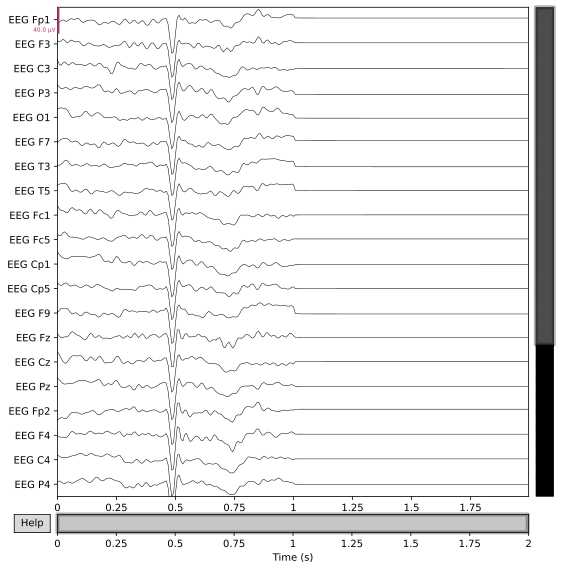

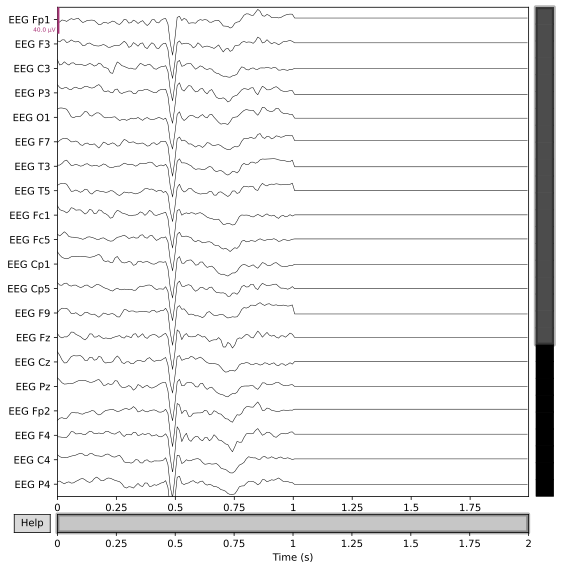

In [61]:
raw2_resampled.plot();
raw2.plot();

In [62]:
raw2_resampled.get_data().shape

(29, 512)

In [63]:
raw2_resampled

Measurement date,"January 01, 2016 02:18:17 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,29 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.50 Hz
Lowpass,30.00 Hz


In [64]:
new_raw2 = mne.filter.resample(raw2.copy().get_data(),down=2.0, axis=-1, window='auto')

In [65]:
new_raw2.shape

(29, 512)

In [66]:
sez = mne.make_fixed_length_epochs(raw2_resampled.copy(),duration=1)

Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated


In [67]:
sez.get_data().shape

Using data from preloaded Raw for 2 events and 256 original time points ...
0 bad epochs dropped


(2, 29, 256)

Using data from preloaded Raw for 2 events and 256 original time points ...


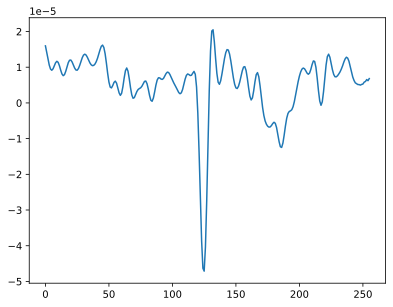

In [68]:
plt.plot(sez.get_data()[0][3])

In [69]:
EEG_sez_epochs = []
#multi_labels =[]
for k in range(len(raw2_resampled.get_data())):
  eeg,_ = split_seq(raw2_resampled.get_data()[k] , 256)
  EEG_sez_epochs.append(eeg)
  #multi_labels.append(labels)

In [70]:
EEG_sez_epochs = array(EEG_sez_epochs)

In [71]:
EEG_sez_epochs.shape

(29, 256, 256)

In [72]:
raw3 = mne.io.read_raw_edf(EEG3_path, preload=True)
raw3_resampled = raw3.copy().resample(sfreq=256)

Extracting EDF parameters from /content/drive/MyDrive/Physionet_EEG/EEG/subject_1/PN00_2_post_seizure_normal_EEG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8703  =      0.000 ...    16.998 secs...


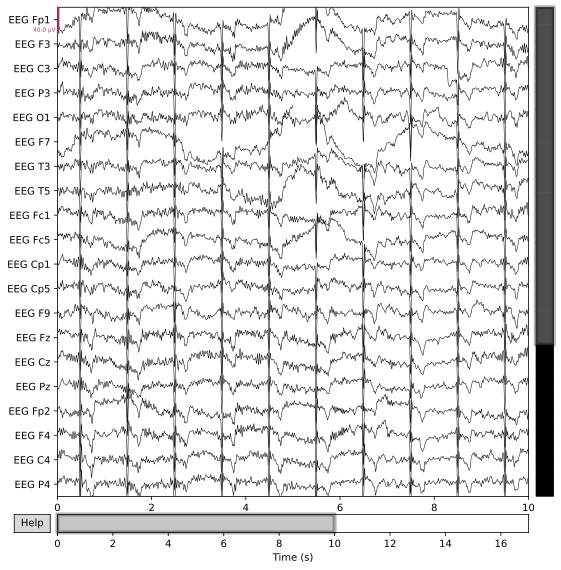

In [73]:
raw3_resampled.plot();

In [74]:
post_sez = mne.make_fixed_length_epochs(raw3_resampled.copy(),duration=1)

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated


In [75]:
post_sez.get_data().shape

Using data from preloaded Raw for 17 events and 256 original time points ...
0 bad epochs dropped


(17, 29, 256)

In [76]:
EEG_pos_sez_epochs = []
#multi_labels =[]
for k in range(len(raw3_resampled.get_data())):
  eeg,_ = split_seq(raw3_resampled.get_data()[k] , 256)
  EEG_pos_sez_epochs.append(eeg)
  #multi_labels.append(labels)

In [77]:
EEG_pos_sez_epochs = array(EEG_pos_sez_epochs)

In [78]:
EEG_pos_sez_epochs.shape

(29, 4096, 256)

In [160]:
Label_presez=torch.zeros(20,1)
Label_presez_1 = torch.zeros(4864,29)
Label_sez = torch.ones(2,1)
Label_sez_1 = torch.ones(256,29)
Label_postesez = torch.ones(17,1)*2
Label_postsez_1 = torch.ones(4096,29)*2

In [104]:
Label_postsez_1.shape
Label_presez_1.shape
Label_sez_1.shape

torch.Size([256, 29])

In [81]:
#import the data
import torch
import torch.nn as nn
import numpy as np

#for printing status
import sys

#for data visualization
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

<ipython-input-81-2ab295a0833a>:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [82]:
post_seizure_EEG = torch.tensor(EEG_pos_sez_epochs)
Seizure_EEG = torch.tensor(EEG_sez_epochs)
pre_seizure_EEG = torch.tensor(EEG_presez_epochs)

In [91]:
print(EEG_pos_sez_epochs.shape)
print(EEG_sez_epochs.shape)
print(EEG_presez_epochs.shape)

(29, 4096, 256)
(29, 256, 256)
(29, 4864, 256)


In [121]:
# Concatenate along axis 0 (rows)
EEG_tensor = torch.cat((post_seizure_EEG, Seizure_EEG, pre_seizure_EEG),dim=1)
print(EEG_tensor.shape)


torch.Size([29, 9216, 256])


In [122]:
EEG_tensor = EEG_tensor.permute(1, 2, 0)
#EEG_tensor = np.transpose(EEG_tensor, (2, 1, 0))
print(EEG_tensor.shape)


torch.Size([9216, 256, 29])


In [161]:
Label_tensor = torch.cat((Label_postsez_1, Label_sez_1, Label_presez_1),dim=0)
print(Label_tensor.shape)


torch.Size([9216, 29])


In [143]:
class rnnnet(nn.Module):
  def __init__(self,input_size,num_hidden,num_layers):
    super().__init__()

    # RNN Layer
    self.rnn = nn.RNN(input_size,num_hidden,num_layers)

    # linear layer for output
    self.out = nn.Linear(num_hidden,1)

  def forward(self, x):

    # run through the RNN layer
    y,hidden = self.rnn(x) # no explicit hidden state initialization

    # and the output (linear) layer
    y = self.out(y)

    return y,hidden

In [147]:
# network parameters
input_size =  29 # "channels" of data
num_hidden =  10 # breadth of model (number of units in hidden layers)
num_layers =  1 # depth of model (number of "stacks" of hidden layers)
seqlength  = 256 # number of datapoints used for learning in each segment
batchsize  =  10000 # Note: the training code is actually hard-coded to organize data into batchsize=1

# create an instance of the model and inspect
net = rnnnet(input_size,num_hidden,num_layers)

X = torch.rand(batchsize,seqlength,input_size)
y,h = net(X) # None is for empty hidden state input
print(X.shape)
print(y.shape) # note: one output per sequence element; generally, we take the final output to force a "many-to-one" design.
print(h.shape)

torch.Size([10000, 256, 29])
torch.Size([10000, 256, 1])
torch.Size([1, 256, 10])


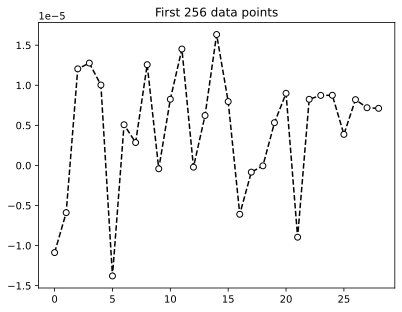

In [132]:
# is it enough data?

plt.plot(EEG_tensor[1000][:][3],'ko--',markerfacecolor='w')
plt.title(f'First {seqlength} data points')
plt.show()

In [151]:

EEG_tensor = EEG_tensor.to(torch.float32)
Label_tensor = Label_tensor.to(torch.float32)


In [156]:
# test the model with some data
somedata = EEG_tensor[0][:][:].view(1,seqlength,29)
y,_ = net(somedata)

# grab the final predicted value from the output (first element of tuple output of net)
finalValue = y[:][-1]

lossfun = nn.MSELoss()
#lossfun(finalValue,data[seqlength].view(1,1))
y.shape

torch.Size([1, 256, 1])

In [142]:
EEG_tensor[0][:][:].view(1,seqlength,29)

tensor([[[-9.5062e-06,  3.2757e-06,  1.0654e-05,  ..., -4.4236e-07,
          -1.6073e-06,  1.4799e-05],
         [-9.7425e-06,  2.2590e-06,  1.0550e-05,  ...,  1.6139e-07,
           3.2823e-07,  1.5683e-05],
         [-1.0456e-05,  2.6835e-07,  9.0283e-06,  ...,  1.3513e-06,
           3.0977e-06,  1.6775e-05],
         ...,
         [ 1.7931e-05,  6.4934e-06, -1.0848e-05,  ..., -5.7097e-06,
           6.0647e-06,  8.6008e-06],
         [ 1.6822e-05,  3.4275e-06, -1.0988e-05,  ..., -4.1081e-06,
           6.4497e-06,  8.4538e-06],
         [ 1.4528e-05,  4.9023e-07, -9.7312e-06,  ..., -1.4013e-06,
           7.4716e-06,  7.4029e-06]]], dtype=torch.float64)

In [ ]:
# number of training epochs
numepochs = 30

# create a new instance of the model (and optimizer!)
net = rnnnet(input_size,num_hidden,num_layers)
optimizer = torch.optim.SGD(net.parameters(),lr=.001)



# initialize losses
losses = np.zeros(numepochs)
signaccuracy = np.zeros(numepochs)

# loop over epochs
for epochi in range(numepochs):

  # loop over data segments
  seglosses = []
  segacc    = []
  hidden_state = torch.zeros(num_layers,batchsize,num_hidden) # reset the hidden state on each epoch

  for timei in range(N-seqlength):

    # grab a snippet of data
    X = data[timei:timei+seqlength].view(seqlength,1,1)
    y = data[timei+seqlength].view(1,1)

    # forward pass and loss
    yHat,hidden_state = net(X)
    finalValue = yHat[-1]
    loss = lossfun(finalValue,y) # compare final value of output

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # loss from this segment
    seglosses.append(loss.item())

    # also get sign accuracy
    truesign = np.sign(torch.squeeze(y).numpy())
    predsign = np.sign(torch.squeeze(finalValue).detach().numpy())
    accuracy = 100*(truesign==predsign)
    segacc.append(accuracy)

  # average losses from this epoch
  losses[epochi] = np.mean(seglosses)
  signaccuracy[epochi] = np.mean(segacc)

  msg = f'Finished epoch {epochi+1}/{numepochs}'
  sys.stdout.write('\r' + msg)

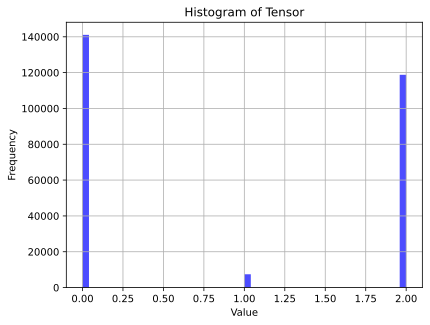

In [162]:
tensor_np = Label_tensor.numpy()

# Flatten the tensor if needed
tensor_flat = tensor_np.flatten()

# Plot histogram
plt.hist(tensor_flat, bins=50, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor')
plt.grid(True)
plt.show()

In [163]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming you have your EEG data and labels ready
#eeg_data = torch.randn(9216, 256, 29)
eeg_data = EEG_tensor  # Example random EEG data tensor
#labels = torch.randint(0, 2, (9216, 29))  # Example random label tensor (binary classification)
labels = Label_tensor

# Split data into training and validation sets
split_ratio = 0.8
split_index = int(split_ratio * len(eeg_data))

train_data, train_labels = eeg_data[:split_index], labels[:split_index]
val_data, val_labels = eeg_data[split_index:], labels[split_index:]

# Create DataLoader for training and validation sets
batch_size = 64
train_dataset = TensorDataset(train_data, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(val_data, val_labels)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the LSTM model
class EEG_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(EEG_LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Initialize the model
input_size = 29  # Number of channels
hidden_size = 64
num_layers = 2
num_classes = 3  # Assuming binary classification

model = EEG_LSTM(input_size, hidden_size, num_layers, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, torch.argmax(labels, dim=1))

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print average loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader)}")

# Evaluate the model on the validation set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

print(f"Accuracy on validation set: {100 * correct / total}%")

Epoch [1/10], Loss: 0.12396087106528034
Epoch [2/10], Loss: 0.000514195930636247
Epoch [3/10], Loss: 0.0002831139521229739
Epoch [4/10], Loss: 0.0001798467901294473
Epoch [5/10], Loss: 0.00012671035237245038
Epoch [6/10], Loss: 9.455004974683859e-05
Epoch [7/10], Loss: 7.336342047171362e-05
Epoch [8/10], Loss: 5.848585545930385e-05
Epoch [9/10], Loss: 4.78387734394095e-05
Epoch [10/10], Loss: 3.996000295642418e-05
Accuracy on validation set: 100.0%
